In [3]:
## Loading packages
from six.moves import urllib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import os
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
print('Done!')
from sklearn.decomposition import PCA
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

Done!


In [4]:
## Forest Cover
covtype = pd.read_csv('covtype.csv')
print(covtype.shape)
print(covtype.columns)

# "class" column as numpy array.
y = covtype["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = covtype.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

In [5]:
Do_PCA=0

if Do_PCA:
    pca=PCA(.9)

    # fit 
    pca.fit(X_tr_Norm)

    # predict 

    X_tr_Norm = pca.transform(X_tr_Norm)
    X_va_Norm = pca.transform(X_va_Norm)
    print('PCA done')

In [31]:
from sklearn.cluster import KMeans

##Choose the number of clusters  in the Kmean method

K=7

kmeans = KMeans(n_clusters=K,max_iter=5000)

# fit the data
kmeans.fit(X_tr_Norm)

# predict
Kmean_pred_tr=kmeans.predict(X_tr_Norm)
Kmean_pred_va=kmeans.predict(X_va_Norm)

In [32]:
Kmean_pred_tr

# Impurity = 1 - sum(prob squared)

array([2, 5, 3, ..., 0, 6, 2])

(7, 54)


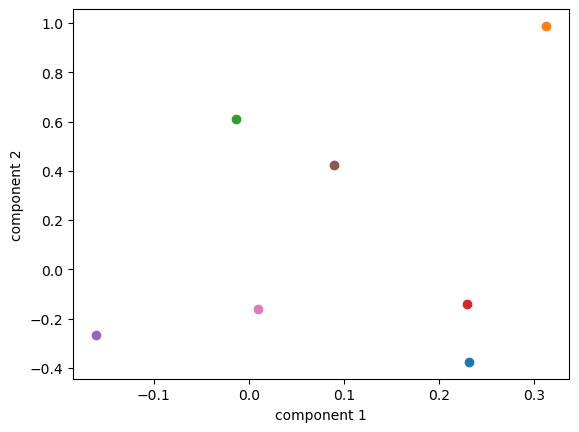

In [33]:
# show the center of the cluster in the two dimention plot (of the selected components):

#choose the two components of PCA
comp_x = 1
comp_y = 2

for k1 in range(K):
  plt.plot(kmeans.cluster_centers_[k1,comp_x],kmeans.cluster_centers_[k1,comp_y],'o')
plt.xlabel('component '+str(comp_x))
plt.ylabel('component '+str(comp_y))

print (np.shape(kmeans.cluster_centers_))

Text(0, 0.5, 'Y')

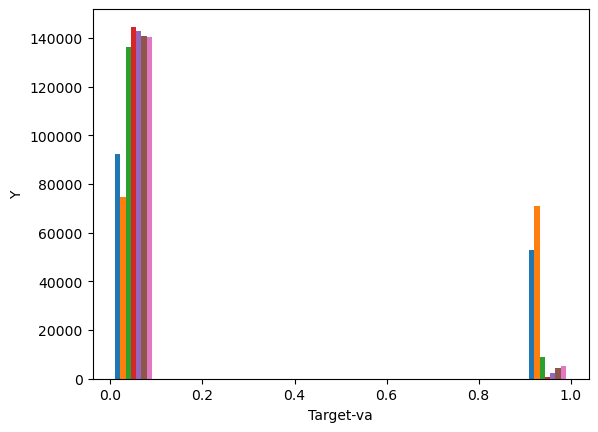

In [34]:
plt.hist(Y_va)
plt.xlabel('Target-va')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

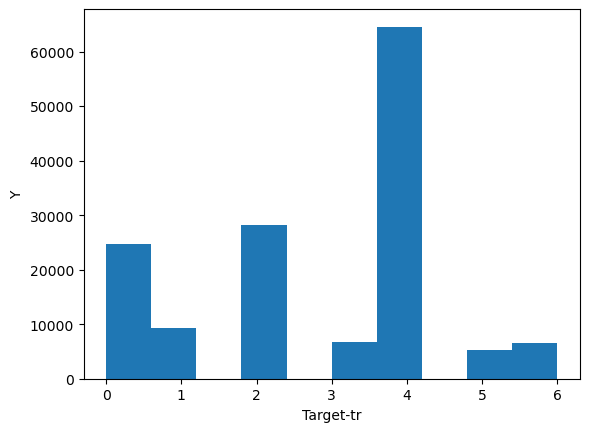

In [35]:
plt.hist(Kmean_pred_va)
plt.xlabel('Target-tr')
plt.ylabel('Y')

In [42]:
condensed = Y_va.argmax(axis=1)
condensed[1]

condensed_tr = Y_tr.argmax(axis=1)

In [37]:
Kmean_pred_va

array([0, 4, 2, ..., 1, 4, 2])

In [38]:
n_correct=0
for k1 in range(len(Y_va)):
    if Kmean_pred_va[k1]==condensed[k1]:
        n_correct +=1

print (n_correct/len(Y_va))

0.11385651243003587


In [43]:
n_correct=0
for k1 in range(len(Y_tr)):
    if Kmean_pred_tr[k1]==condensed_tr[k1]:
        n_correct +=1

print (n_correct/len(Y_tr))

0.11450595397914902
